In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import binary_accuracy
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
best_model = load_model(r'model/best_model.h5')
#best_model = load_model(r'model\best_model2.h5')

In [3]:
best_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 240, 25)           2700      
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 12002     
Total params: 14,702
Trainable params: 14,702
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_predict = y_predict.rename({0:'Stock0'}, axis= 'columns')
y_prob = y_prob.rename({0:'Stock0'}, axis= 'columns')

In [15]:
y_predict

,Stock0
0,1
1,1
2,1
3,1
4,0
...,...
225,0
226,0
227,0
228,0


In [16]:
y_prob

,Stock0
0,0.518397
1,0.525043
2,0.541669
3,0.554921
4,0.459853
...,...
225,0.477537
226,0.483631
227,0.488927
228,0.484983


In [17]:
for i in range(1,486):
    filepath = 'testData\\s' + str(i) + '.csv'
    stock = pd.read_csv(filepath)
    stock = stock.set_index('Date')
    std_scaler = StandardScaler()
    std_stock_fit = std_scaler.fit_transform(stock)
    std_stock = pd.DataFrame(std_stock_fit, columns=stock.columns,
                             index=list(stock.index.values))
    stock_test = std_stock.to_numpy()
    stock_test = stock_test.reshape(stock_test.shape[0],stock_test.shape[1],1)
    
    y_pred = best_model.predict(stock_test)
    
    y_result = []
    y_prob_iter = []
    for idx,val in enumerate(y_pred):
        y_prob_iter.append(val[1])
        y_result.append([np.argmax(val)])
        
    iter_predict = pd.DataFrame(y_result)
    y_prob_iter = pd.DataFrame(y_prob_iter)
    
    s_name = 'Stock' + str(i)
    iter_predict = iter_predict.rename({0:s_name}, axis= 'columns')
    y_prob_iter = y_prob_iter.rename({0:s_name}, axis= 'columns')  
                                      
    y_predict = pd.concat([y_predict, iter_predict], axis = 1)
    y_prob = pd.concat([y_prob, y_prob_iter], axis = 1)                   

In [18]:
y_prob

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock476,Stock477,Stock478,Stock479,Stock480,Stock481,Stock482,Stock483,Stock484,Stock485
0,0.518397,0.474813,0.474813,0.518093,0.484867,0.548728,0.502323,0.498831,0.409823,0.507264,...,0.555910,0.489660,0.511264,0.499963,0.493400,0.468538,0.506408,0.470791,0.556256,0.474813
1,0.525043,0.526112,0.526112,0.528331,0.469473,0.528987,0.507340,0.493532,0.452160,0.496916,...,0.566960,0.482770,0.508547,0.475015,0.482018,0.483789,0.472365,0.493994,0.523475,0.526112
2,0.541669,0.544713,0.544713,0.505862,0.514592,0.516265,0.495826,0.524958,0.490618,0.505527,...,0.531102,0.486816,0.510496,0.520214,0.513899,0.507717,0.529562,0.513790,0.545644,0.544713
3,0.554921,0.539546,0.539546,0.490346,0.513126,0.588110,0.541643,0.551568,0.508752,0.523469,...,0.552128,0.492413,0.530535,0.538506,0.530870,0.524011,0.550356,0.510945,0.558550,0.539546
4,0.459853,0.513574,0.513574,0.515066,0.485487,0.546768,0.495356,0.531999,0.479502,0.521863,...,0.517485,0.500664,0.495608,0.580379,0.516988,0.505651,0.514783,0.504998,0.530044,0.513574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.477537,0.495375,0.495375,0.551125,0.491573,0.507807,0.523733,0.502855,0.504286,0.504879,...,0.497213,0.507550,0.494016,0.471735,0.502121,0.479408,0.503643,0.498942,0.501609,0.495375
226,0.483631,0.496516,0.496516,0.531572,0.506151,0.490445,0.503959,0.513997,0.514911,0.497945,...,0.477490,0.520959,0.467563,0.493160,0.500465,0.498719,0.527413,0.533019,0.479822,0.496516
227,0.488927,0.492674,0.492674,0.539349,0.506496,0.498988,0.509392,0.521455,0.516969,0.506797,...,0.500833,0.526196,0.533199,0.531504,0.525452,0.497905,0.519841,0.529320,0.501937,0.492674
228,0.484983,0.495349,0.495349,0.492260,0.510760,0.488857,0.517011,0.492162,0.528205,0.471360,...,0.507091,0.518902,0.476632,0.509154,0.490221,0.485872,0.506177,0.506487,0.508493,0.495349


In [19]:
y_predict

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock476,Stock477,Stock478,Stock479,Stock480,Stock481,Stock482,Stock483,Stock484,Stock485
0,1,0,0,1,0,1,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
1,1,1,1,1,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
2,1,1,1,1,1,1,0,1,0,1,...,1,0,1,1,1,1,1,1,1,1
3,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
4,0,1,1,1,0,1,0,1,0,1,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,1,0,1,0,1,0
226,0,0,0,1,1,0,1,1,1,0,...,0,1,0,0,1,0,1,1,0,0
227,0,0,0,1,1,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,0
228,0,0,0,0,1,0,1,0,1,0,...,1,1,0,1,0,0,1,1,1,0


In [20]:
y_true = y_true.drop(['Median'], axis=1)

In [21]:
y_true

,Change0,Change1,Change2,Change3,Change4,Change5,Change6,Change7,Change8,Change9,...,Change476,Change477,Change478,Change479,Change480,Change481,Change482,Change483,Change484,Change485
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2020-01-27,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2020-01-28,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2020-01-29,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2020-12-15,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2020-12-16,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [22]:
y_t = y_true.to_numpy().flatten().tolist()
y_p = y_predict.to_numpy().flatten().tolist()

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
confusion_matrix(y_t,y_p)

array([[25672, 30042],
       [24327, 31739]], dtype=int64)

In [24]:
precision_score(y_t,y_p)

0.5137339958887036

In [25]:
accuracy_score(y_t,y_p)

0.5136070853462158

In [26]:
y_prob

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock476,Stock477,Stock478,Stock479,Stock480,Stock481,Stock482,Stock483,Stock484,Stock485
0,0.518397,0.474813,0.474813,0.518093,0.484867,0.548728,0.502323,0.498831,0.409823,0.507264,...,0.555910,0.489660,0.511264,0.499963,0.493400,0.468538,0.506408,0.470791,0.556256,0.474813
1,0.525043,0.526112,0.526112,0.528331,0.469473,0.528987,0.507340,0.493532,0.452160,0.496916,...,0.566960,0.482770,0.508547,0.475015,0.482018,0.483789,0.472365,0.493994,0.523475,0.526112
2,0.541669,0.544713,0.544713,0.505862,0.514592,0.516265,0.495826,0.524958,0.490618,0.505527,...,0.531102,0.486816,0.510496,0.520214,0.513899,0.507717,0.529562,0.513790,0.545644,0.544713
3,0.554921,0.539546,0.539546,0.490346,0.513126,0.588110,0.541643,0.551568,0.508752,0.523469,...,0.552128,0.492413,0.530535,0.538506,0.530870,0.524011,0.550356,0.510945,0.558550,0.539546
4,0.459853,0.513574,0.513574,0.515066,0.485487,0.546768,0.495356,0.531999,0.479502,0.521863,...,0.517485,0.500664,0.495608,0.580379,0.516988,0.505651,0.514783,0.504998,0.530044,0.513574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.477537,0.495375,0.495375,0.551125,0.491573,0.507807,0.523733,0.502855,0.504286,0.504879,...,0.497213,0.507550,0.494016,0.471735,0.502121,0.479408,0.503643,0.498942,0.501609,0.495375
226,0.483631,0.496516,0.496516,0.531572,0.506151,0.490445,0.503959,0.513997,0.514911,0.497945,...,0.477490,0.520959,0.467563,0.493160,0.500465,0.498719,0.527413,0.533019,0.479822,0.496516
227,0.488927,0.492674,0.492674,0.539349,0.506496,0.498988,0.509392,0.521455,0.516969,0.506797,...,0.500833,0.526196,0.533199,0.531504,0.525452,0.497905,0.519841,0.529320,0.501937,0.492674
228,0.484983,0.495349,0.495349,0.492260,0.510760,0.488857,0.517011,0.492162,0.528205,0.471360,...,0.507091,0.518902,0.476632,0.509154,0.490221,0.485872,0.506177,0.506487,0.508493,0.495349


In [27]:
change_value = pd.read_csv('change_value.csv')

In [28]:
change_value = change_value.set_index('Date')

In [29]:
change_value = change_value[-230:]

In [30]:
change_value = change_value.drop(['Median'],axis =1)

In [31]:
new_name = []
for i in range(486):
    name = 'Stock' + str(i)
    new_name.append(name)

In [32]:
change_value.columns = new_name

In [33]:
change_value

,Stock0,Stock1,Stock2,Stock3,Stock4,Stock5,Stock6,Stock7,Stock8,Stock9,...,Stock476,Stock477,Stock478,Stock479,Stock480,Stock481,Stock482,Stock483,Stock484,Stock485
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0023,-0.0147,-0.0147,-0.0080,-0.0100,-0.0121,-0.0011,-0.0263,-0.0538,-0.0088,...,-0.0313,0.0040,-0.0196,-0.0157,-0.0107,-0.0094,-0.0065,-0.0114,-0.0243,-0.0147
2020-01-27,-0.0141,-0.0026,-0.0026,-0.0084,-0.0097,-0.0182,-0.0127,-0.0216,-0.0185,-0.0147,...,-0.0806,-0.0037,-0.0132,-0.0377,-0.0155,-0.0056,-0.0375,0.0016,-0.0036,-0.0026
2020-01-28,-0.0572,0.0169,0.0169,0.0306,0.0179,0.0293,0.0223,0.0258,-0.0035,0.0050,...,0.0087,0.0045,0.0494,0.0166,0.0131,0.0041,0.0195,0.0078,0.0136,0.0169
2020-01-29,-0.0216,0.0018,0.0018,0.0098,-0.0108,0.0062,-0.0084,-0.0598,-0.0002,0.0069,...,-0.0090,0.0030,-0.0014,-0.1070,0.0234,0.0173,0.0088,0.0104,-0.0153,0.0018
2020-01-30,0.0031,-0.0035,-0.0035,-0.0106,0.0020,0.0081,0.0144,0.0267,-0.0237,-0.0069,...,0.0224,0.0199,0.0068,-0.0098,0.0059,-0.0003,-0.0154,0.0029,0.0084,-0.0035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,-0.0054,-0.0002,-0.0002,0.0355,-0.0085,0.0270,0.0221,0.0342,-0.0006,0.0071,...,-0.0310,0.0006,-0.0009,0.0362,-0.0136,-0.0046,0.0156,0.0064,-0.0233,-0.0002
2020-12-15,0.0092,0.0154,0.0154,0.0289,0.0135,0.0114,-0.0078,0.0247,0.0145,0.0460,...,0.0610,0.0151,0.0449,0.0207,0.0271,0.0178,-0.0000,0.0366,0.0221,0.0154
2020-12-16,0.0042,-0.0083,-0.0083,-0.0044,0.0016,0.0150,0.0150,-0.0028,0.0093,-0.0171,...,0.0099,-0.0065,-0.0307,-0.0024,-0.0075,0.0004,-0.0158,0.0070,0.0062,-0.0083


In [34]:
# k개의 long과 short 로 trading!
trade_value = []
for i in range (230):
    val = 0
    prob_iter = y_prob.iloc[i]
    change_iter = change_value.iloc[i]
    
    prob_sort = prob_iter.sort_values() 
    
    long_list = prob_sort.index[-10:]
    short_list = prob_sort.index[:10]
    
    long_val = []
    short_val = []
    for name1, name2 in zip(long_list,short_list):
        val += change_iter[name1]
        val -= change_iter[name2]
        long_val.append(change_iter[name1])
        short_val.append(change_iter[name2])
        
    trade_value.append(val)


In [35]:
np.average(trade_value)

-0.01564521739130435

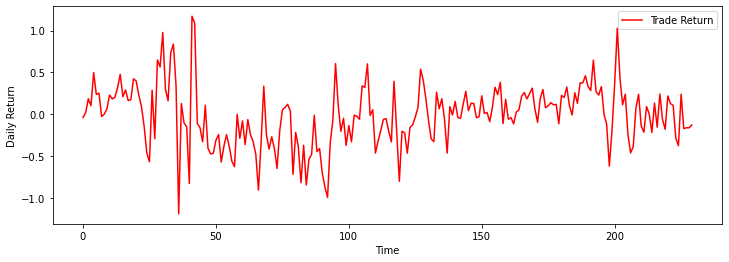

In [36]:
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(trade_value, 'r-')
plt.legend(['Trade Return'])
plt.xlabel('Time')
plt.ylabel('Daily Return')
plt.show()